In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
import random

import cv2
import numpy as np
import pandas as pd
import h5py

import keras
from keras import models
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn

sys.path.append("..") 
from train import plot_history

In [7]:
class_names = {0: 'alien',
                 1: 'devil',
                 2: 'ghost',
                 3: 'hearteyes',
                 4: 'lipstick',
                 5: 'octopus',
                 6: 'poop',
                 7: 'robot',
                 8: 'rocket',
                 9: 'unicorn'}

In [8]:
h5_file = '../output-aws/tenclasses-augm/simple_cnn_multi_10c_with_aug.h5'
hdf5_file = '../output-aws/tenclasses-augm/hdf5/simple_cnn_multi-071-0.163.hdf5'

# h5_file = './output-aws/fiveclasses-augm/simple_cnn_multi_5c_with_aug.h5'
# hdf5_file = './output-aws/fiveclasses-augm/hdf5/simple_cnn_multi-099-0.079.hdf5'

def load_model_and_weights(h5_file, hdf5_file):
    model = models.load_model(h5_file)
    model.load_weights(hdf5_file)
    
    return model

model = load_model_and_weights(h5_file, hdf5_file)

/Users/koshkin/miniconda3/lib/python3.6/site-packages/keras/models.py:288: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


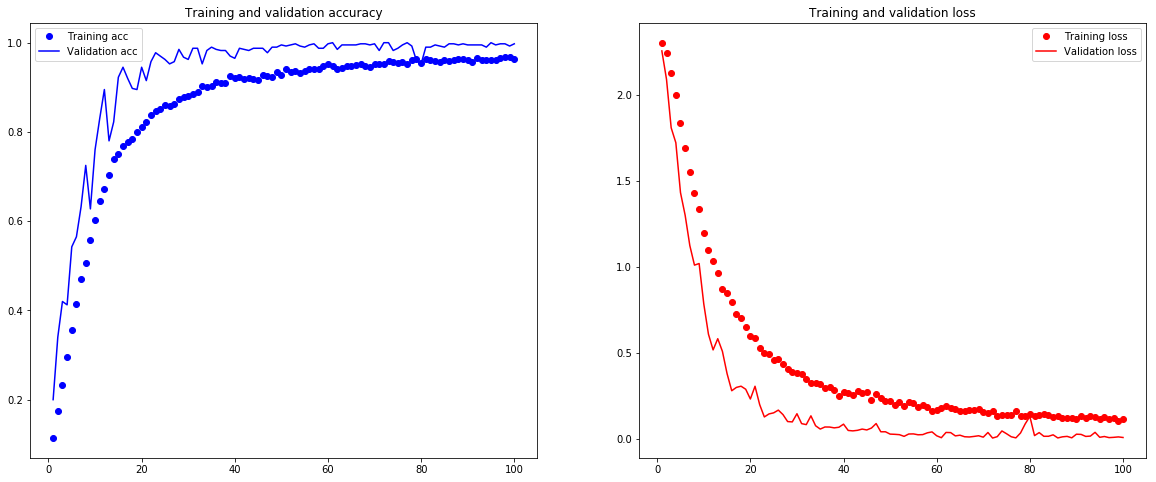

In [10]:
history = '../output-aws/tenclasses-augm/logs/history_hist_simple_cnn_multi_10c_with_aug.csv'
dfh = pd.read_csv(history)
plot_history(dfh)

In [12]:
test_dir = '../images/ten_multiclass/test/'
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(320, 240),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 10 classes.
test acc: 0.9969999992847443


In [11]:
from sklearn.metrics import classification_report

In [16]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_dir,
    target_size=(320, 240),
    batch_size=12,
    class_mode='categorical',
    shuffle=False)

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())    

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

Found 1000 images belonging to 10 classes.
             precision    recall  f1-score   support

      alien       1.00      0.84      0.91       100
      devil       0.86      0.99      0.92       100
      ghost       0.96      1.00      0.98       100
  hearteyes       1.00      0.68      0.81       100
   lipstick       0.99      0.97      0.98       100
    octopus       1.00      0.86      0.92       100
       poop       0.96      1.00      0.98       100
      robot       0.75      1.00      0.85       100
     rocket       0.94      0.92      0.93       100
    unicorn       0.92      1.00      0.96       100

avg / total       0.94      0.93      0.92      1000

